In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from matplotlib.colors import LightSource
from nice import niceAxis,text3d

In [2]:
n = 101
X = Y = np.linspace(-1, 1, n)
X,Y = np.meshgrid(X, Y)
R = np.sqrt(5*(X**2+Y**2))
Z = 0.5*np.exp(-0.5*R*R)
X,Y = (1+X)/2, (1+Y)/2

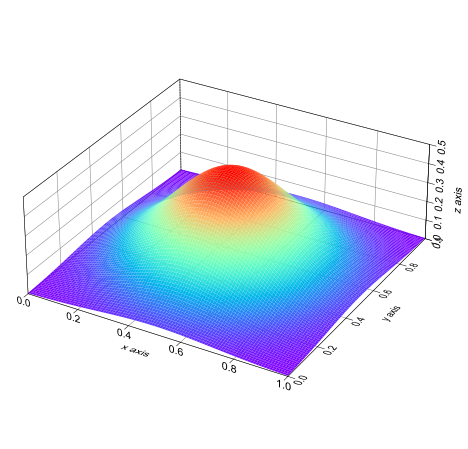

In [14]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

ax.plot_surface(X,Y,Z, cmap='rainbow', rstride=1, cstride=1)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,0.5)

niceAxis(ax,label3D=True, fs_label=0.08)

plt.show()

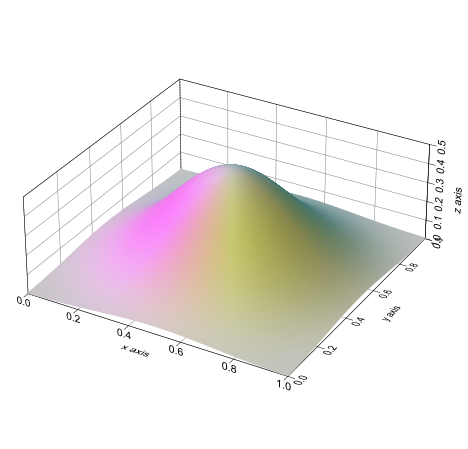

In [24]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

C = np.ones((X.shape[0],X.shape[1], 3))
I1=LightSource(azdeg=0, altdeg=25).hillshade(Z).reshape(n,n,1)
I2=LightSource(azdeg=120, altdeg=25).hillshade(Z).reshape(n,n,1)
I3=LightSource(azdeg=240, altdeg=25).hillshade(Z).reshape(n,n,1)
C=0.5*C + (I1*(1,0,0) + I2*(0,1,0) + I3*(0,0,1))
C=np.minimum(C, (1,1,1))

# C[::2, ::2] = C[1::2, 1::2] = 0,0,0

ax.plot_surface(X,Y,Z, facecolors=C, rstride=1, cstride=1)


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,0.5)

niceAxis(ax,label3D=True, fs_label=0.08)

# ax.axis('off')
plt.savefig('test.pdf')
os.system('pdfcrop test.pdf test.pdf')
os.system('open test.pdf')
plt.show()

In [30]:
# Wavefront loader (only vertices and faces)
def obj_load(filename):
    V, Vi = [], []
    with open(filename) as f:
        for line in f.readlines():
            if line.startswith('#'): continue
            values = line.split()
            if not values: continue
            if values[0] == 'v':
                V.append([float(x) for x in values[1:4]])
            elif values[0] == 'f' :
                Vi.append([int(x) for x in values[1:4]])
    return np.array(V), np.array(Vi)-1
V, F = obj_load("Data/bunny.obj")



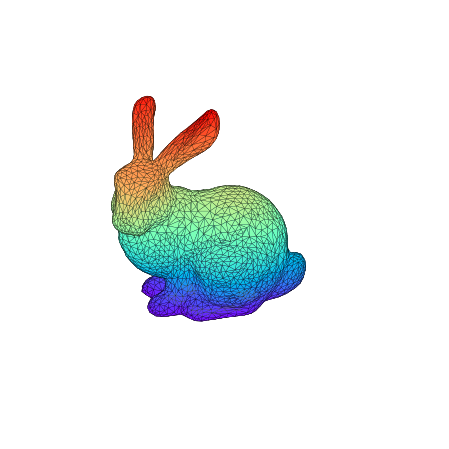

In [43]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

ax.plot_trisurf(V[:,0],V[:,2],V[:,1],triangles=F, cmap='rainbow',edgecolor='k',linewidth=0.2)
ax.set_xlim(-0.1,0.1)
ax.set_ylim(-0.1, 0.1)
ax.set_zlim(0,0.2)
ax.view_init(elev=30, azim=-270)
ax.invert_yaxis()
ax.set_box_aspect((1,1,1))

ax.axis('off')
plt.show()